In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/exp-1_train.csv')

In [3]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
x = data.iloc[0:700,0:1]
y = data.iloc[0:700,1:2]

In [5]:
x

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


<Axes: >

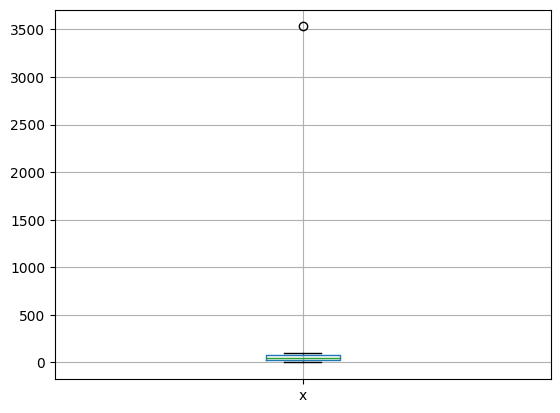

In [6]:
x.boxplot(column=['x'])

<Axes: >

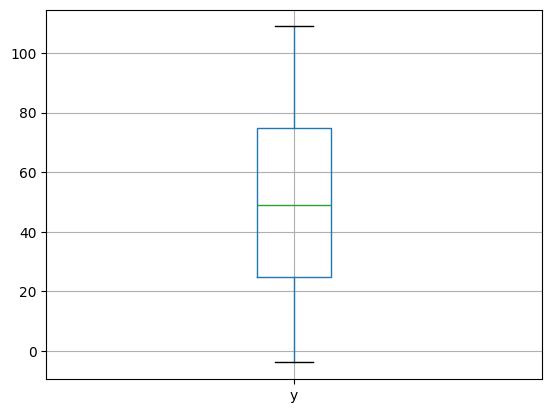

In [7]:
y.boxplot(column=['y'])

Text(0.5, 1.0, 'X vs Y scatter plot')

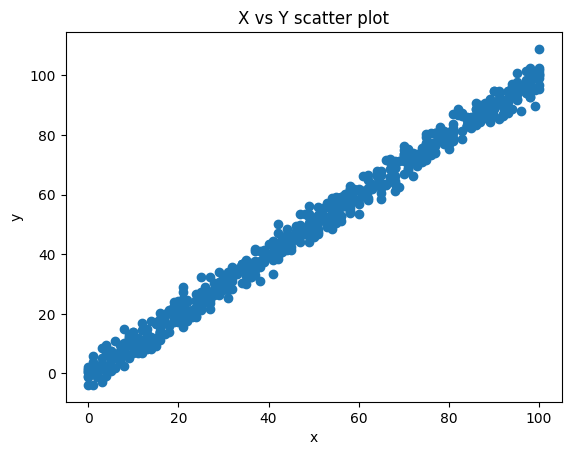

In [8]:
#Plot the scatter plot
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("X vs Y scatter plot")

In [9]:
#Linear Regression
def hypothesis(theta_array, x):
  return theta_array[0]+theta_array[1]*x

In [10]:
def cost_function(theta_array,x,y,m):
  errors = 0
  for i in range(m):
    errors+=((theta_array[0]+theta_array[1]*x[i])-y[i])**2
  return (1/2*m)*errors

In [11]:
#Gradient is the change in values
#Implementing the Gradient descent functions
def gradient_descent(theta_array,x,y,m,alpha):
  error_1 = 0
  error_2 = 0
  for i in range(m):
    error_1 += ((theta_array[0]+theta_array[1]*x[i])-y[i])
    error_2 += x[i]*((theta_array[0]+theta_array[1]*x[i])-y[i])

  new_theta1 = theta_array[0]-(alpha/m)*error_1
  new_theta2 = theta_array[0]-(alpha/m)*error_2
  updated_new_theta = [new_theta1,new_theta2]
  return updated_new_theta

In [12]:
def training(x,y,alpha,iters):
  theta1 = 0
  theta2 = 0
  cost_values = []
  theta_array=[theta1,theta2]
  m=x.size

  # The gradient descent does the optimization of the training model
  for i in range(iters):
    theta_array = gradient_descent(theta_array,x,y,m,alpha)
    cost_values.append(cost_function(theta_array, x, y, m))
    y_predict = x*theta_array[1]+theta_array[0]
    plt.plot(y_predict, x, 'b')
    plt.scatter(x, y)
    plt.show()
  return cost_values, theta_array

In [13]:
#Feedind the input data
training_data = data.dropna()


In [14]:
training_data.shape

(699, 2)

In [15]:
x_value = training_data['x']
y_value = training_data['y']

In [16]:
type(x_value)

pandas.core.series.Series

In [17]:
x_value = x_value.values.reshape(x_value.size)
y_value = y_value.values.reshape(y_value.size)

In [18]:
type(x_value)

numpy.ndarray

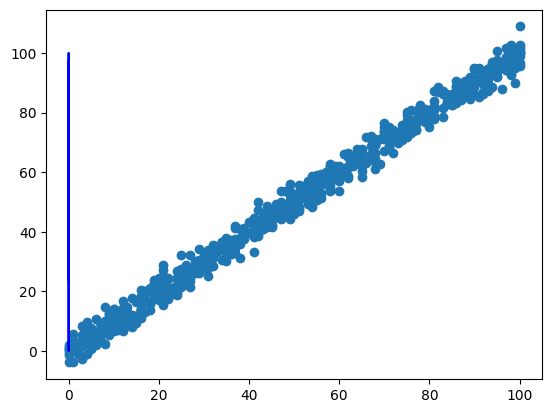

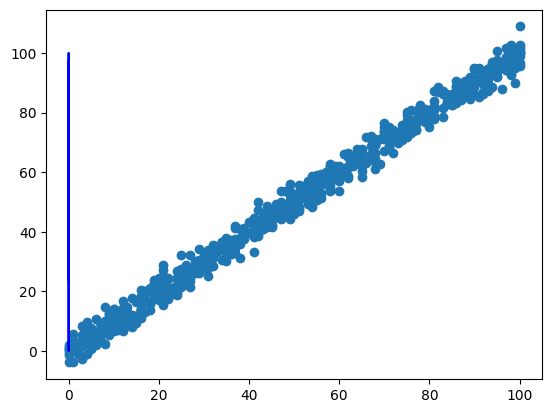

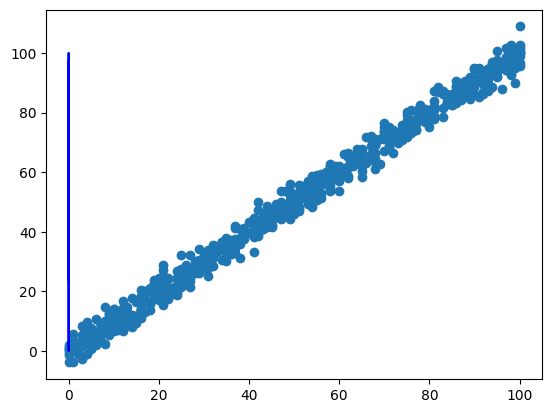

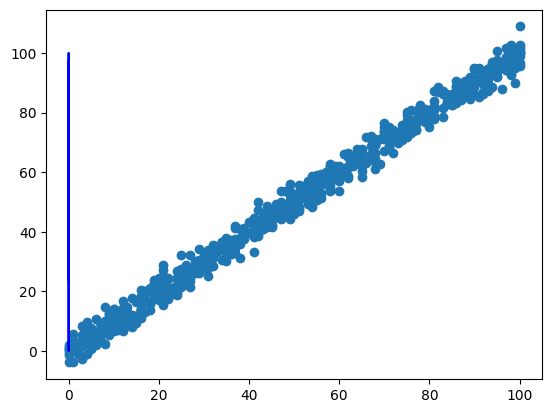

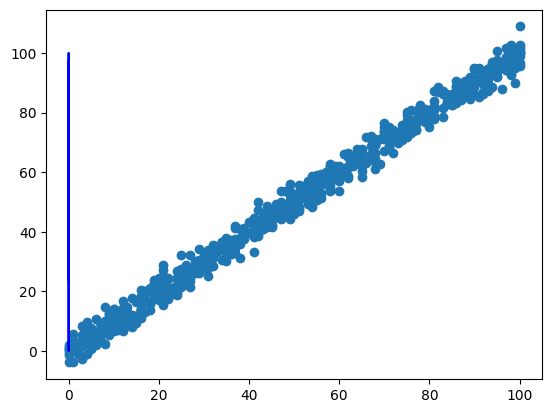

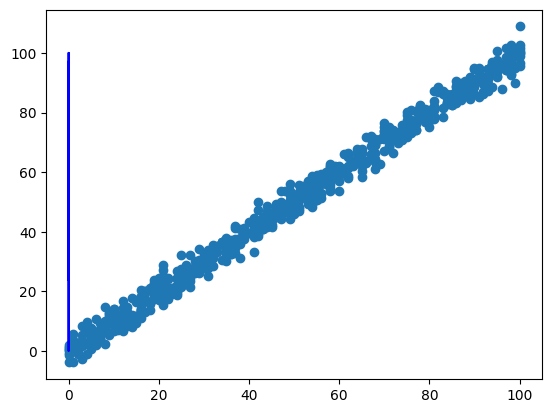

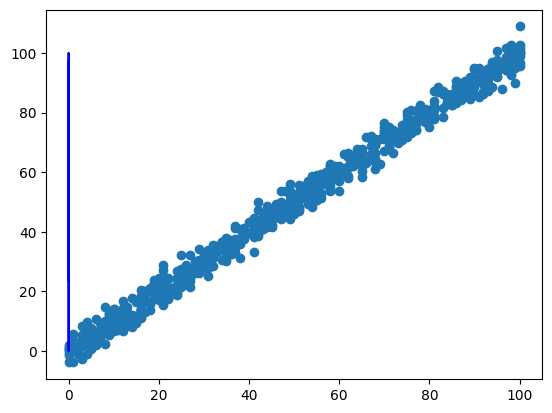

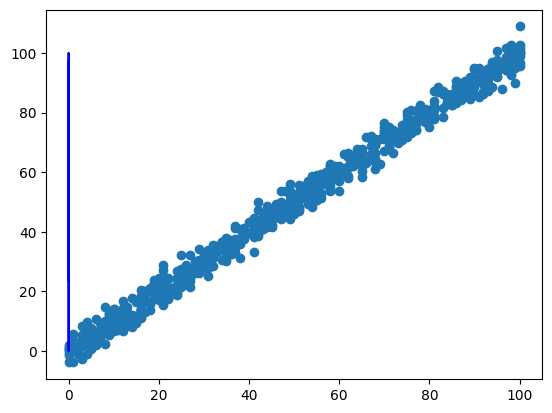

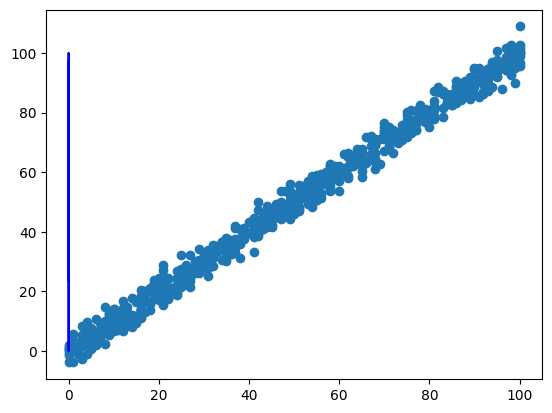

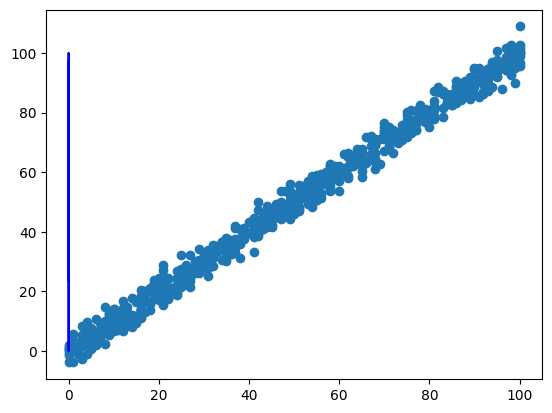

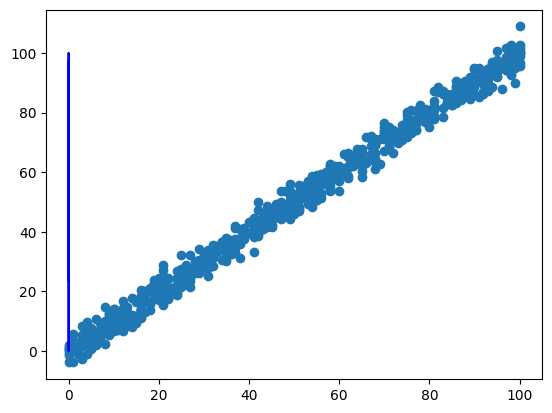

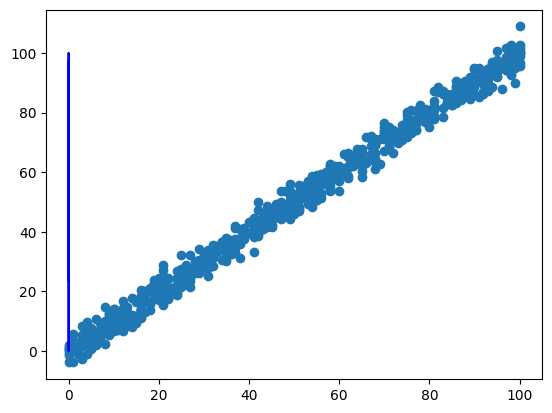

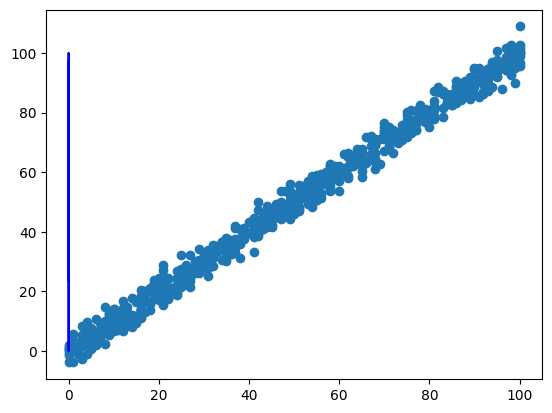

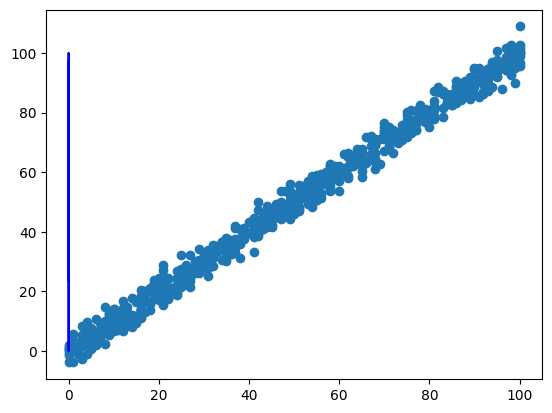

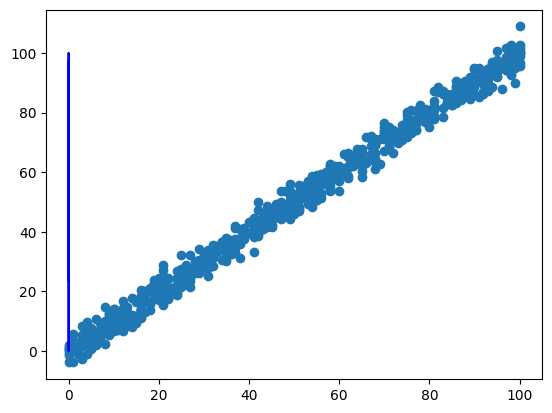

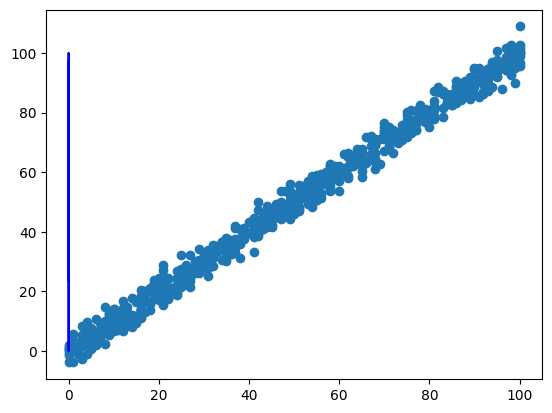

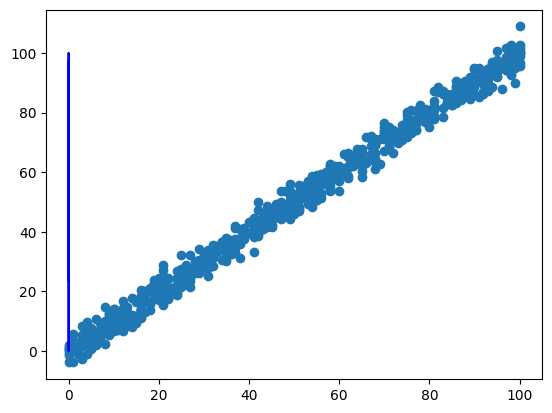

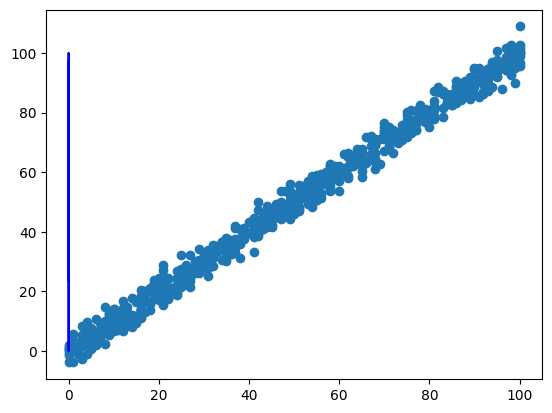

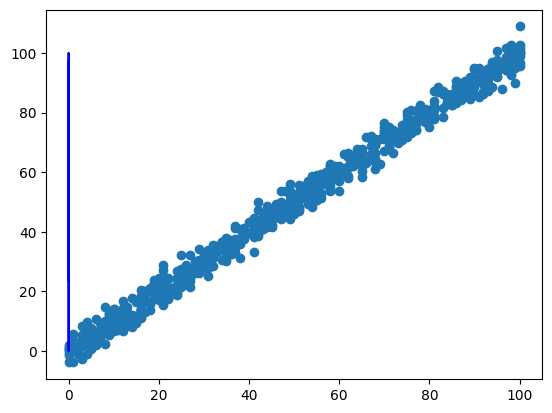

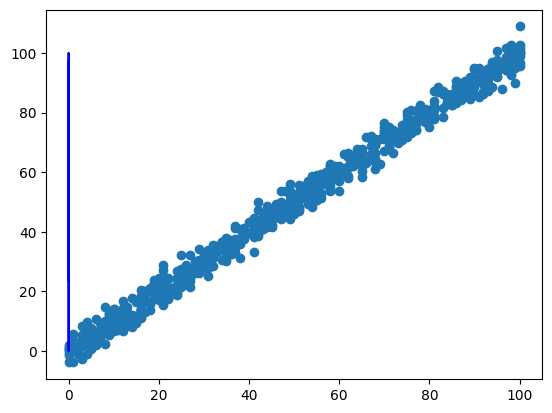

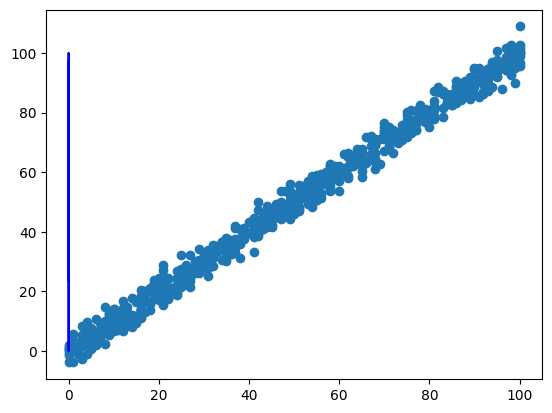

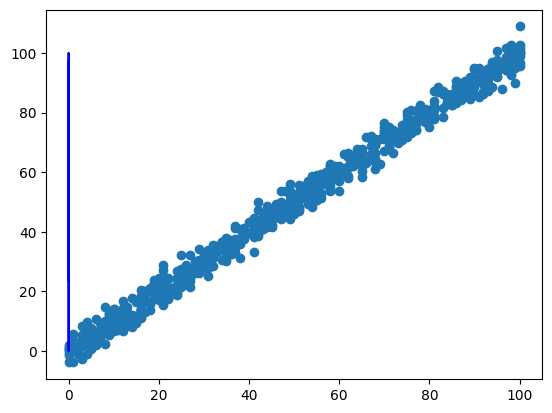

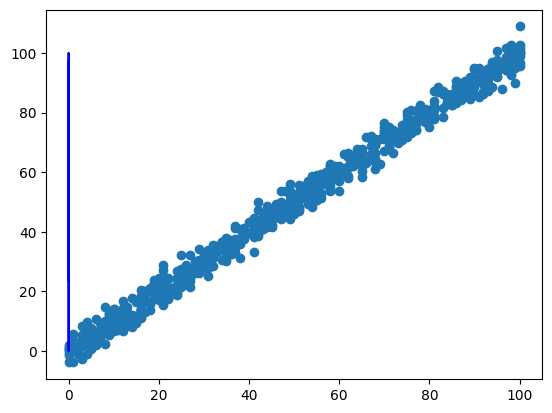

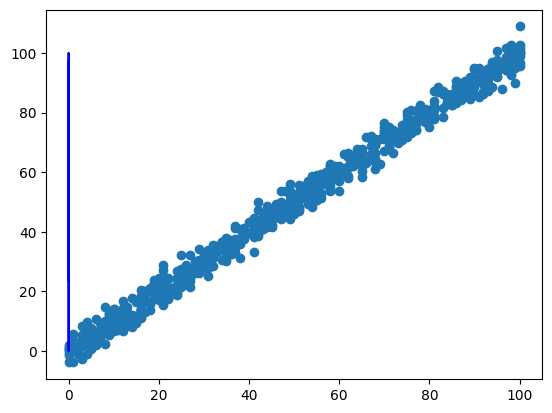

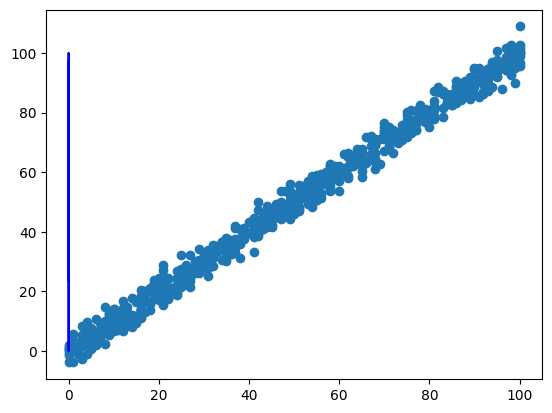

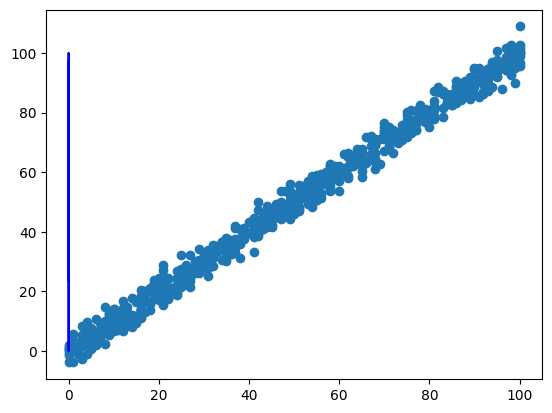

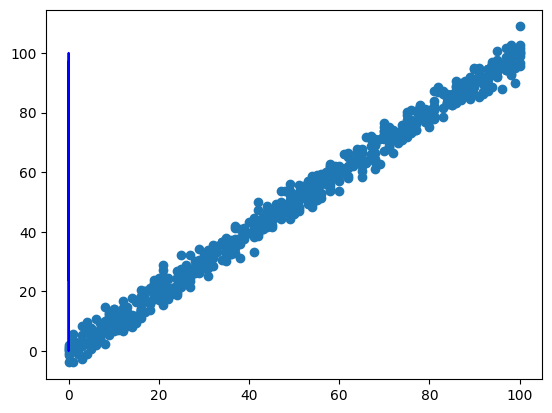

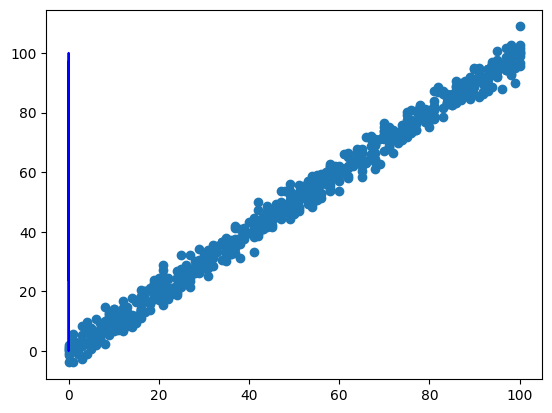

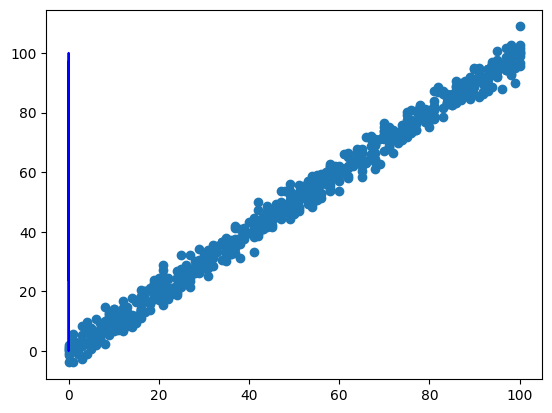

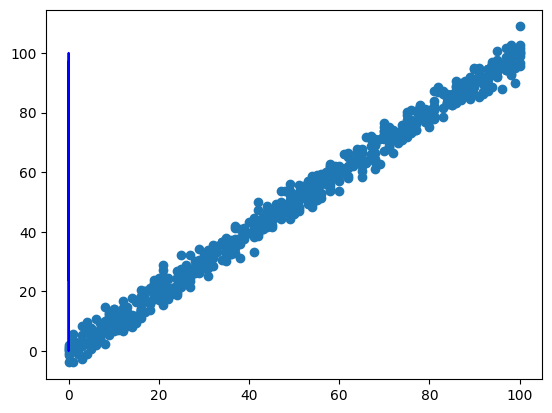

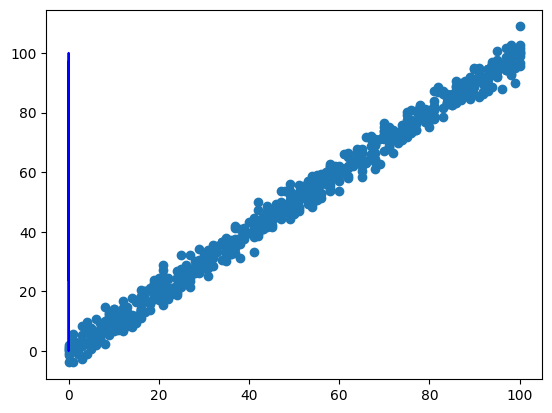

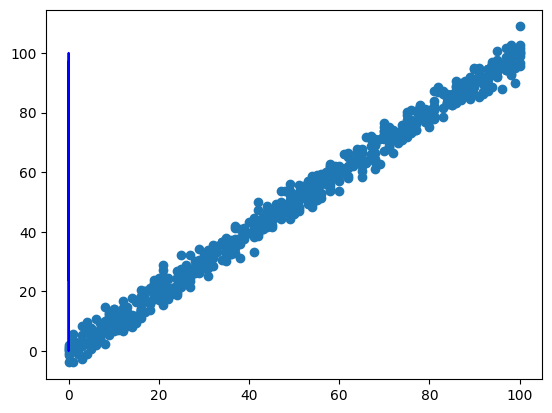

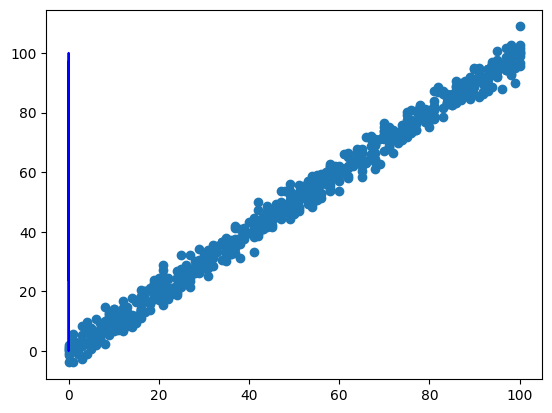

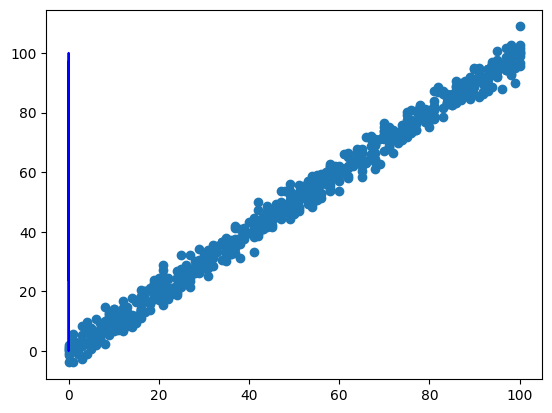

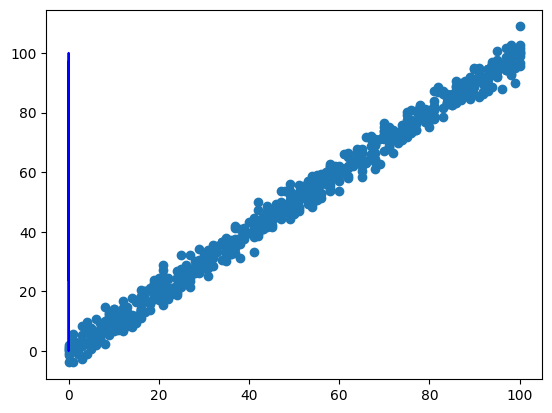

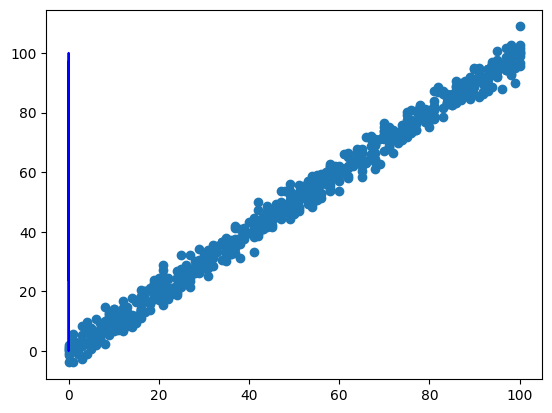

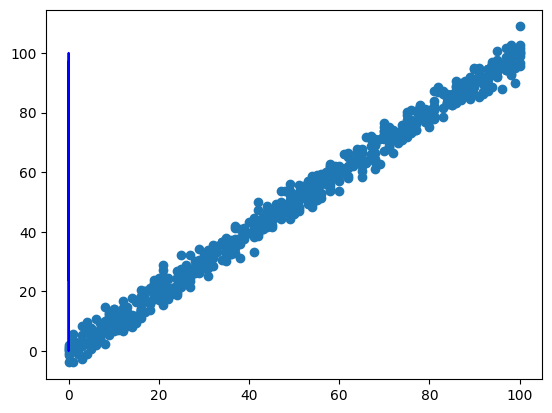

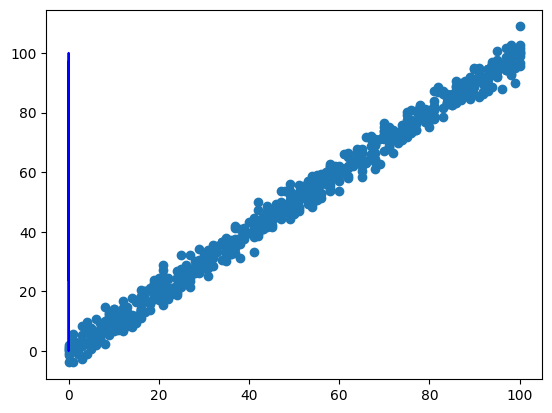

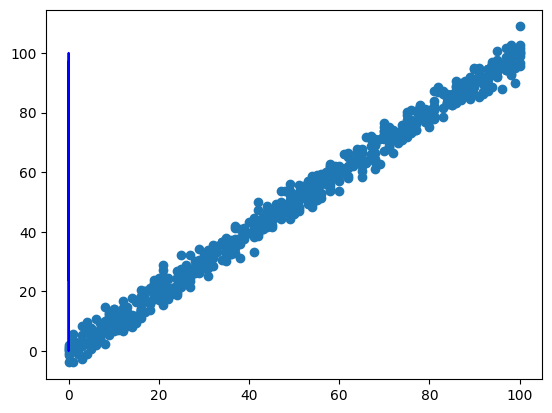

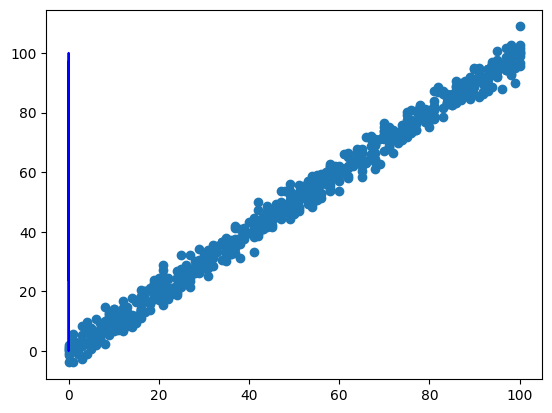

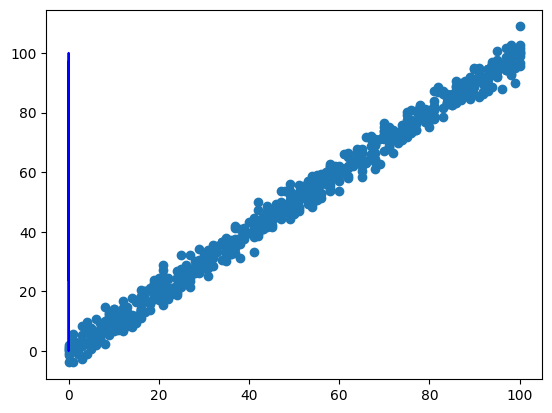

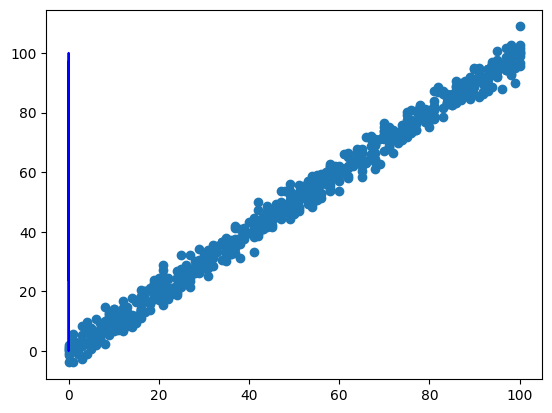

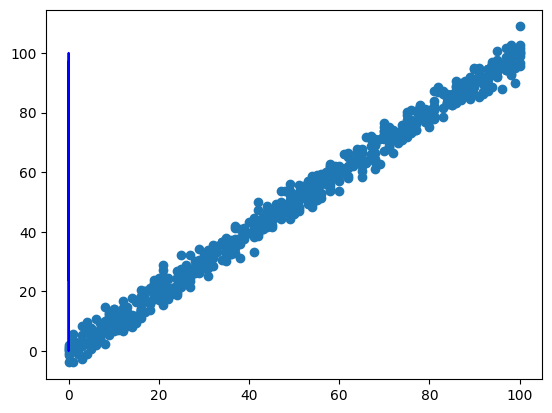

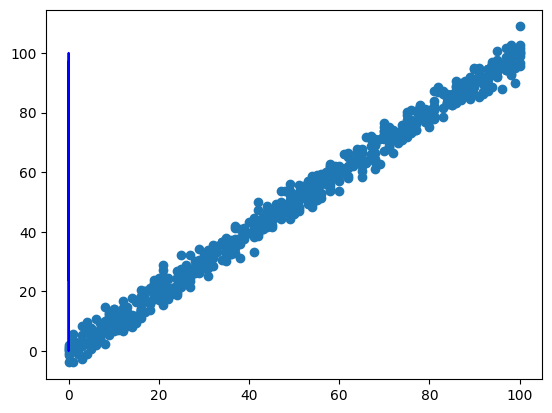

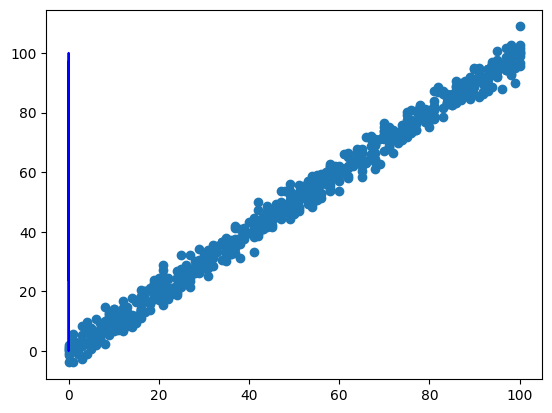

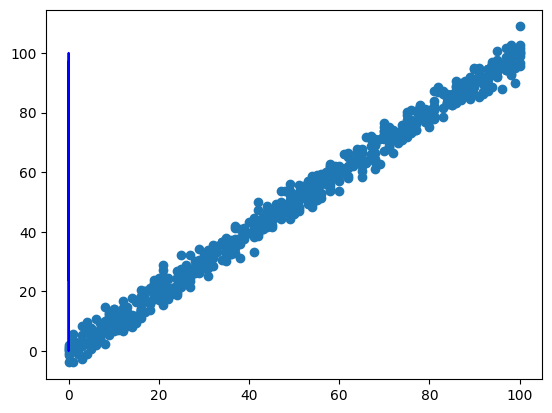

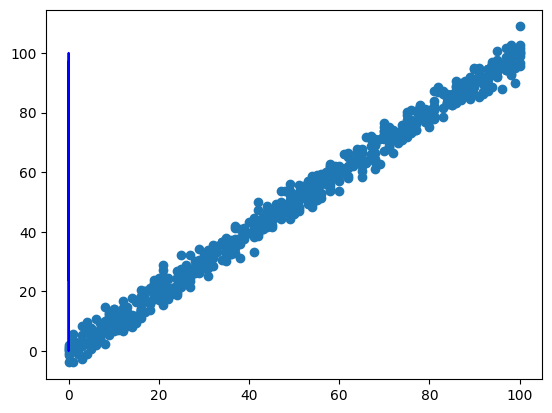

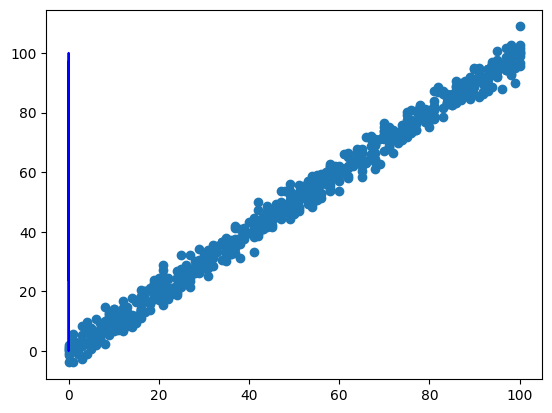

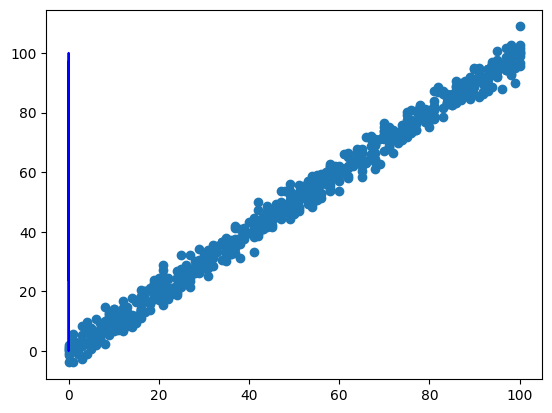

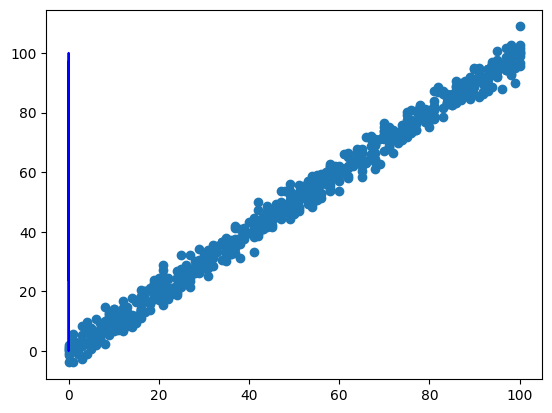

In [21]:
alpha = 0.000000001
iters = 50
cost_values, theta_array = training(x_value,y_value,alpha,iters)

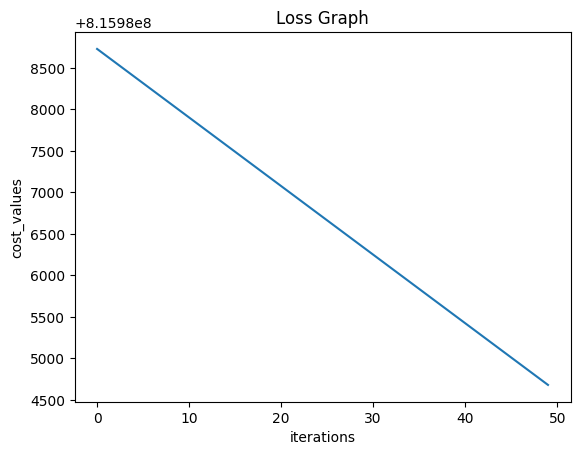

[np.float64(2.4969822859618305e-06), np.float64(5.7824480295354616e-06)] 12.0


In [22]:
x_axis = np.arange(0, len(cost_values), step = 1)
plt.plot(x_axis, cost_values)
plt.xlabel('iterations')
plt.ylabel('cost_values')
plt.title('Loss Graph')
plt.show()

print(theta_array, 12.0)

In [ ]:
# What is the optimal value of theta zero and one?
#Homework
#Observe the loss function curve for#alpha = 0,000000001,0.000001, 0.01, 1, 5, 10, 100